Notebook for some dumb calculations because I don't know observational astronomy. The ultimate point of it is to figure out the fiducial bright sky

In [1]:
import numpy as np 
import astropy.units as u
from datetime import datetime
from astroplan import Observer
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun, get_moon
from astropy.coordinates import CartesianRepresentation, HeliocentricTrueEcliptic
# -- feasiBGS -- 
from feasibgs import skymodel as Sky

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
# GAMA DR3 G15 field center
ra = 215.0 * u.deg
dec = 0. * u.deg
coord = SkyCoord(ra=ra, dec=dec)
print coord

<SkyCoord (ICRS): (ra, dec) in deg
    (215., 0.)>


In [4]:
kpno = EarthLocation.of_site('kitt peak') 
site = Observer(kpno, timezone='UTC')

In [8]:
utc_time = Time(datetime(2019, 4, 15, 3, 0, 0)) # sometime in April at 7 am UTC (1am MST)
kpno_altaz = AltAz(obstime=utc_time, location=kpno)
sun_rise = site.sun_rise_time(utc_time, which='next')
sun_set = site.sun_set_time(utc_time, which='previous')
print 'last sun set', sun_set.datetime
print 'next sun rise', sun_rise.datetime
coord_altaz = coord.transform_to(kpno_altaz)
print 'object altitude', coord_altaz.alt.deg
assert coord_altaz.alt.deg > 0.
print 'airmass', coord_altaz.secz
print 'ecliptic latitude', coord.barycentrictrueecliptic.lat.deg
print 'galactic latitude', coord.galactic.l.deg
print 'galactic longitude', coord.galactic.b.deg

sun = get_sun(utc_time)
sun_altaz = sun.transform_to(kpno_altaz)
print 'sun altitude', sun_altaz.alt.deg
print 'sun separation', coord.separation(sun).deg

moon = get_moon(utc_time)
moon_altaz = moon.transform_to(kpno_altaz)
print 'moon altitude', moon_altaz.alt.deg
print 'moon separation', coord.separation(moon).deg

elongation = sun.separation(moon)
phase = np.arctan2(sun.distance * np.sin(elongation), moon.distance - sun.distance * np.cos(elongation))
print 'moon phase', phase.value
print 'moon illumination', (1.+np.cos(phase))/2.

last sun set 2019-04-15 01:50:53.180248
next sun rise 2019-04-15 13:01:49.777021
object altitude 9.38535650618
airmass 6.1321924736
ecliptic latitude 13.1885083393
galactic latitude 344.674991626
galactic longitude 55.5239026277
sun altitude -14.060252488
sun separation 110.287485705
moon altitude 69.7414666344
moon separation 15.7294389075
moon phase 1.03256535852
moon illumination 0.756308937046


In [5]:
for month in range(3, 6):
    for day in range(1, 30):
        for hour in range(4, 12): 
            obs_time = datetime(2019, month, day, hour, 0, 0)
            try: 
                skysp = Sky.skySpec(215., 0., obs_time)
                if ((skysp.altm * skysp.illm).value > 30.) and (skysp.X < 1.4): 
                    print('Bright Sky')
                    print('---- 2019/%i/%i/%i ----' % (month, day, ((hour - 7) % 24) % 12))
                    print('moon sep = %f deg' % skysp.delm)
            except: 
                pass

/Users/chang/anaconda2/lib/python2.7/site-packages/feasibgs/skymodel.py:269: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  coeffs = pd.DataFrame.from_csv(f)


Bright Sky
---- 2019/3/17/1 ----
moon sep = 39.031704 deg
Bright Sky
---- 2019/3/18/1 ----
moon sep = 38.083501 deg
Bright Sky
---- 2019/3/18/2 ----
moon sep = 38.043967 deg
Bright Sky
---- 2019/3/19/1 ----
moon sep = 37.134639 deg
Bright Sky
---- 2019/3/19/2 ----
moon sep = 37.095115 deg
Bright Sky
---- 2019/3/19/3 ----
moon sep = 37.055592 deg
Bright Sky
---- 2019/3/20/1 ----
moon sep = 36.186922 deg
Bright Sky
---- 2019/3/20/2 ----
moon sep = 36.147489 deg
Bright Sky
---- 2019/3/20/3 ----
moon sep = 36.108060 deg
Bright Sky
---- 2019/3/20/4 ----
moon sep = 36.068638 deg
Bright Sky
---- 2019/3/21/1 ----
moon sep = 35.242376 deg
Bright Sky
---- 2019/3/21/2 ----
moon sep = 35.203120 deg
Bright Sky
---- 2019/3/21/3 ----
moon sep = 35.163873 deg
Bright Sky
---- 2019/3/21/4 ----
moon sep = 35.124635 deg
Bright Sky
---- 2019/3/22/1 ----
moon sep = 34.303072 deg
Bright Sky
---- 2019/3/22/2 ----
moon sep = 34.264077 deg
Bright Sky
---- 2019/3/22/3 ----
moon sep = 34.225095 deg
Bright Sky
---

In [6]:
for month in [3]: 
    for day in range(1, 31):
        print('--- 2019/%i/%i ---' % (month, day))
        for hour in range(4, 12): 
            utc_time = Time(datetime(2019, month, day, hour, 0, 0)) # sometime in April at 7 am UTC (1am MST)
            kpno_altaz = AltAz(obstime=utc_time, location=kpno)
            print('%i oclock' % (hour-7))
            sun = get_sun(utc_time)
            sun_altaz = sun.transform_to(kpno_altaz)
            #print 'sun altitude', sun_altaz.alt.deg
            #print 'sun separation', coord.separation(sun).deg

            moon = get_moon(utc_time)
            moon_altaz = moon.transform_to(kpno_altaz)
            print 'moon azimuth', moon_altaz.az.deg
            print 'moon altitude', moon_altaz.alt.deg
            #print 'moon separation', coord.separation(moon).deg

            elongation = sun.separation(moon)
            phase = np.arctan2(sun.distance * np.sin(elongation), moon.distance - sun.distance * np.cos(elongation))
            #print 'moon phase', phase.value
            print 'moon illumination', (1.+np.cos(phase))/2.

--- 2019/3/1 ---
-3 oclock
moon azimuth 27.1740967608
moon altitude -78.705329589
moon illumination 0.24820684352
-2 oclock
moon azimuth 64.967777133
moon altitude -69.6617111715
moon illumination 0.244760841691
-1 oclock
moon azimuth 80.1015623907
moon altitude -58.0710467409
moon illumination 0.241333234336
0 oclock
moon azimuth 89.2468194204
moon altitude -45.9787971558
moon illumination 0.23792417614
1 oclock
moon azimuth 96.4512418645
moon altitude -33.8212592953
moon illumination 0.234533820929
2 oclock
moon azimuth 103.087489094
moon altitude -21.7894170481
moon illumination 0.231162321662
3 oclock
moon azimuth 109.849504186
moon altitude -10.0423196668
moon illumination 0.227809830417
4 oclock
moon azimuth 117.249100764
moon altitude 1.2269695943
moon illumination 0.224476498459
--- 2019/3/2 ---
-3 oclock
moon azimuth 331.046399614
moon altitude -78.100466591
moon illumination 0.170883915473
-2 oclock
moon azimuth 36.4296001477
moon altitude -77.1528834929
moon illumination 0.1

moon azimuth 279.772432852
moon altitude 3.44759609142
moon illumination 0.187888487383
-1 oclock
moon azimuth 287.721721293
moon altitude -8.42277689228
moon illumination 0.191188348657
0 oclock
moon azimuth 296.679290227
moon altitude -19.6909575945
moon illumination 0.194512906395
1 oclock
moon azimuth 307.461746487
moon altitude -29.9606216411
moon illumination 0.19786199606
2 oclock
moon azimuth 321.028008314
moon altitude -38.6017457124
moon illumination 0.20123545106
3 oclock
moon azimuth 338.107341903
moon altitude -44.6623643713
moon illumination 0.2046331028
4 oclock
moon azimuth 358.079165604
moon altitude -47.0333978412
moon illumination 0.208054780614
--- 2019/3/12 ---
-3 oclock
moon azimuth 269.844207912
moon altitude 27.3204320685
moon illumination 0.269723751463
-2 oclock
moon azimuth 277.38402993
moon altitude 15.0438662246
moon illumination 0.273546306055
-1 oclock
moon azimuth 284.809879455
moon altitude 3.01712871255
moon illumination 0.27738923793
0 oclock
moon azi

moon azimuth 182.709636491
moon altitude 60.2389281483
moon illumination 0.997285018014
2 oclock
moon azimuth 209.943403855
moon altitude 56.444933699
moon illumination 0.99692393611
3 oclock
moon azimuth 229.940777569
moon altitude 48.200075494
moon illumination 0.996512448887
4 oclock
moon azimuth 243.818669009
moon altitude 37.6144111593
moon illumination 0.996050711656
--- 2019/3/22 ---
-3 oclock
moon azimuth 102.901499201
moon altitude 15.4316259956
moon illumination 0.98070234207
-2 oclock
moon azimuth 112.30986263
moon altitude 27.0716666655
moon illumination 0.97937168261
-1 oclock
moon azimuth 124.024698071
moon altitude 37.8545565238
moon illumination 0.977995187875
0 oclock
moon azimuth 139.616980167
moon altitude 46.9672976086
moon illumination 0.976573158587
1 oclock
moon azimuth 160.50028967
moon altitude 53.0248387688
moon illumination 0.975105901353
2 oclock
moon azimuth 185.29576287
moon altitude 54.3564534887
moon illumination 0.97359372851
3 oclock
moon azimuth 208.5

(0.0, 1.0)

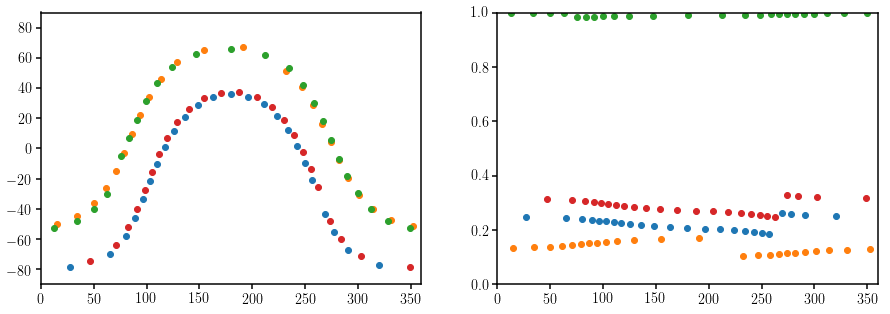

In [11]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(121)
sub1 = fig.add_subplot(122)
for day in [1, 10, 20, 30]: 
    moon_azs = [] 
    moon_alts = [] 
    moon_ills = []
    for hour in range(0, 24): 
        utc_time = Time(datetime(2019, 3, day, hour, 0, 0)) # sometime in April at 7 am UTC (1am MST)
        kpno_altaz = AltAz(obstime=utc_time, location=kpno)
        sun = get_sun(utc_time)
        sun_altaz = sun.transform_to(kpno_altaz)
        #print 'sun altitude', sun_altaz.alt.deg
        #print 'sun separation', coord.separation(sun).deg

        moon = get_moon(utc_time)
        moon_altaz = moon.transform_to(kpno_altaz)
        moon_azs.append(moon_altaz.az.deg)
        moon_alts.append(moon_altaz.alt.deg)

        elongation = sun.separation(moon)
        phase = np.arctan2(sun.distance * np.sin(elongation), moon.distance - sun.distance * np.cos(elongation))
        #print 'moon phase', phase.value
        moon_ills.append((1.+np.cos(phase))/2.)


    sub.scatter(moon_azs, moon_alts)
    sub1.scatter(moon_azs, moon_ills)
sub.set_xlim([0., 360.])
sub.set_ylim([-90., 90.])
sub1.set_xlim([0., 360.])
sub1.set_ylim([0., 1.])

(0.0, 1.0)

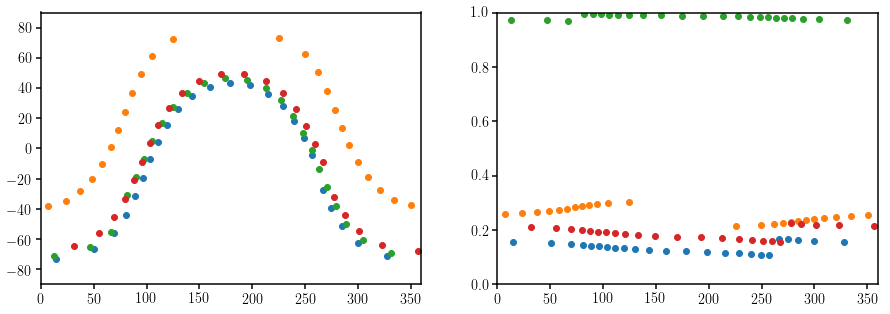

In [10]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(121)
sub1 = fig.add_subplot(122)
for day in [1, 10, 20, 30]: 
    moon_azs = [] 
    moon_alts = [] 
    moon_ills = []
    for hour in range(0, 24): 
        utc_time = Time(datetime(2019, 4, day, hour, 0, 0)) # sometime in April at 7 am UTC (1am MST)
        kpno_altaz = AltAz(obstime=utc_time, location=kpno)
        sun = get_sun(utc_time)
        sun_altaz = sun.transform_to(kpno_altaz)
        #print 'sun altitude', sun_altaz.alt.deg
        #print 'sun separation', coord.separation(sun).deg

        moon = get_moon(utc_time)
        moon_altaz = moon.transform_to(kpno_altaz)
        moon_azs.append(moon_altaz.az.deg)
        moon_alts.append(moon_altaz.alt.deg)

        elongation = sun.separation(moon)
        phase = np.arctan2(sun.distance * np.sin(elongation), moon.distance - sun.distance * np.cos(elongation))
        #print 'moon phase', phase.value
        moon_ills.append((1.+np.cos(phase))/2.)

    sub.scatter(moon_azs, moon_alts)
    sub1.scatter(moon_azs, moon_ills)
sub.set_xlim([0., 360.])
sub.set_ylim([-90., 90.])
sub1.set_xlim([0., 360.])
sub1.set_ylim([0., 1.])

(0.0, 1.0)

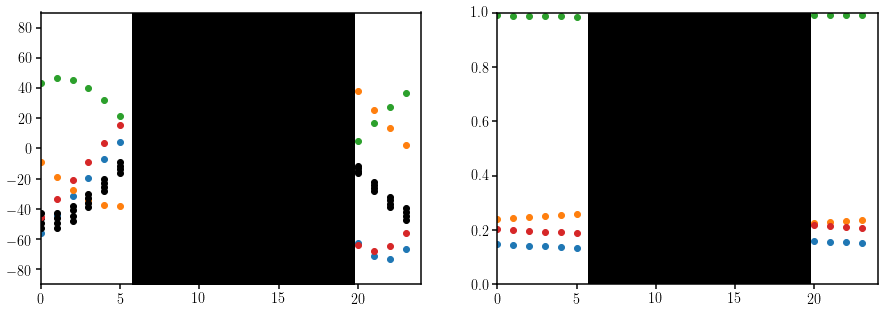

In [28]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(121)
sub1 = fig.add_subplot(122)
for day in [1, 10, 20, 30]: 
    moon_azs = [] 
    moon_alts = [] 
    moon_ills = []
    sun_azs = [] 
    sun_alts = [] 
    for hour in range(0, 24): 
        utc_time = Time(datetime(2019, 4, day, hour, 0, 0)) # sometime in April at 7 am UTC (1am MST)
        kpno_altaz = AltAz(obstime=utc_time, location=kpno)
        sun = get_sun(utc_time)
        sun_altaz = sun.transform_to(kpno_altaz)
        sun_azs.append(sun_altaz.az.deg)
        sun_alts.append(sun_altaz.alt.deg)
        #print 'sun altitude', sun_altaz.alt.deg
        #print 'sun separation', coord.separation(sun).deg

        moon = get_moon(utc_time)
        moon_altaz = moon.transform_to(kpno_altaz)
        moon_azs.append(moon_altaz.az.deg)
        moon_alts.append(moon_altaz.alt.deg)

        elongation = sun.separation(moon)
        phase = np.arctan2(sun.distance * np.sin(elongation), moon.distance - sun.distance * np.cos(elongation))
        #print 'moon phase', phase.value
        moon_ills.append((1.+np.cos(phase))/2.)
    sub.scatter(((np.arange(0,24)-7) % 24), moon_alts)
    sub.scatter(((np.arange(0,24)-7) % 24), sun_alts, c='k')
    sub1.scatter(((np.arange(0,24)-7) % 24), moon_ills)
    t_rise = ((site.sun_rise_time(utc_time, which='next').datetime.hour+site.sun_rise_time(utc_time, which='next').datetime.minute/60.- 7.) % 24)
    t_set = ((site.sun_set_time(utc_time, which='previous').datetime.hour+site.sun_rise_time(utc_time, which='next').datetime.minute/60.- 7.) % 24)
    sub.fill_between([t_set, t_rise], [-90., -90.], [90., 90.], color='k')
    sub1.fill_between([t_set, t_rise], [-90., -90.], [90., 90.], color='k')
sub.set_xlim([0., 24.])
sub.set_ylim([-90., 90.])
sub1.set_xlim([0., 24.])
sub1.set_ylim([0., 1.])